```
 Name: 張宸愷
 ID: 0710018
 ```

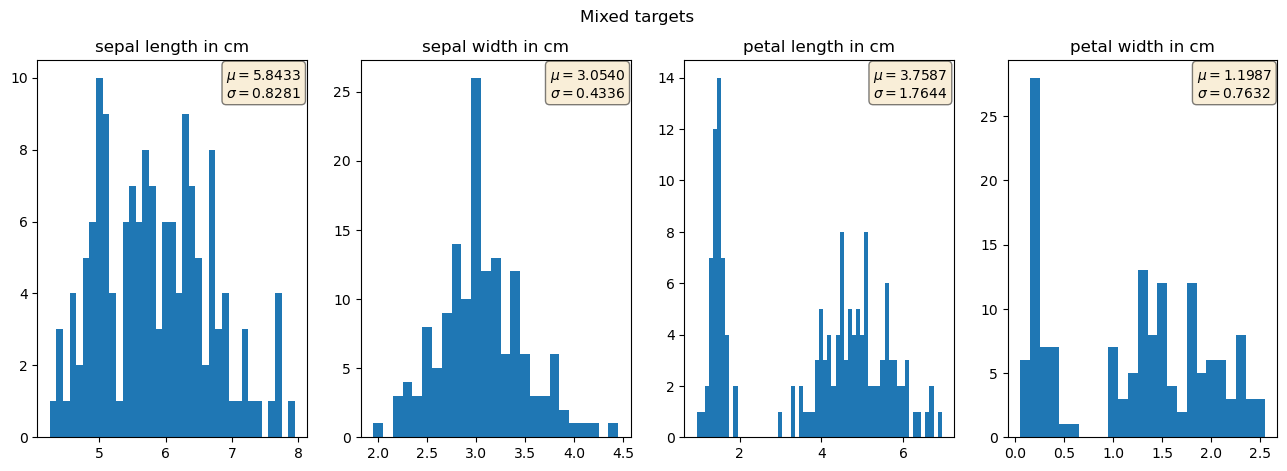

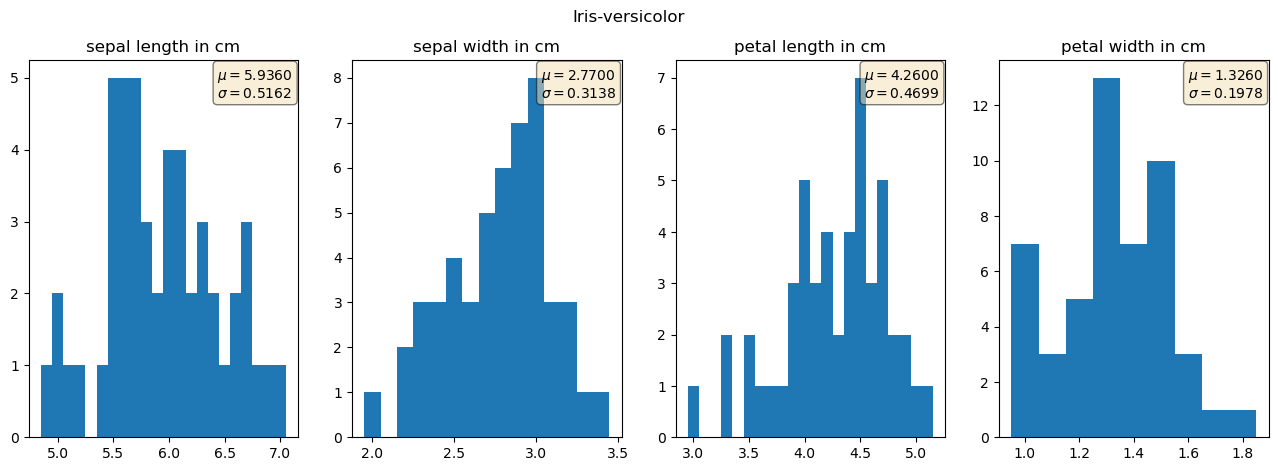

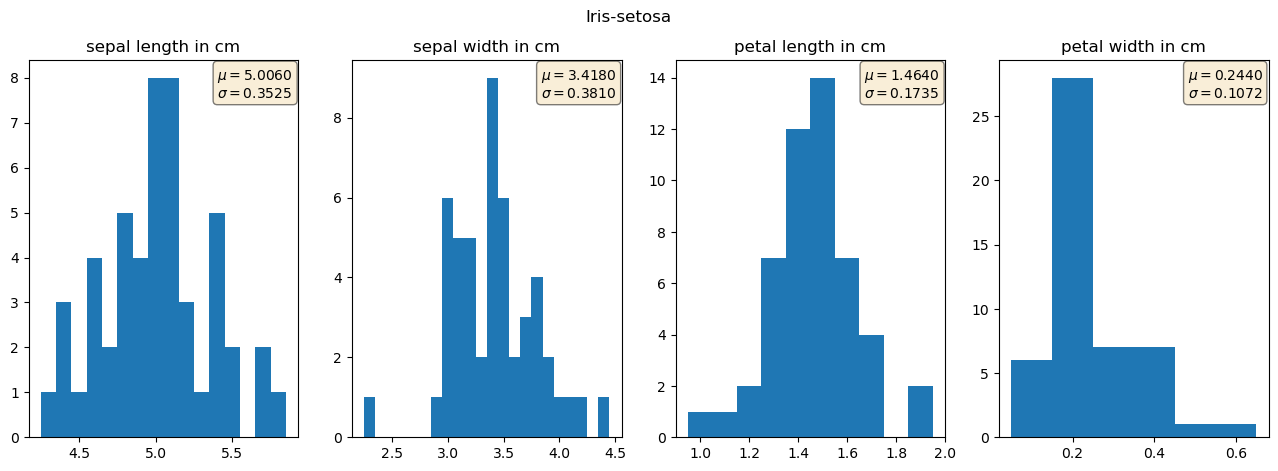

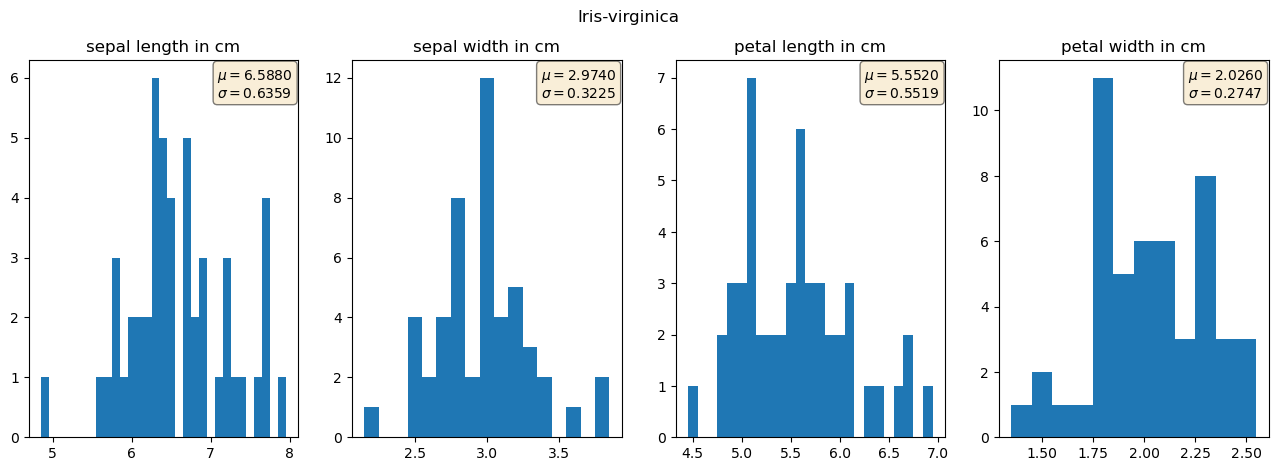

In [1]:
# data visualization

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

visual_data: pd.DataFrame = pd.read_csv(
    "data/iris.data", sep=",", header=None)

titles = ["sepal length in cm", "sepal width in cm",
          "petal length in cm", "petal width in cm"]

generate_graph = True

if (generate_graph):
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # plot mixed
    fig, axs = plt.subplots(1, 4, figsize=(16, 5), dpi=100)
    for c in range(0, 4):

        cur = visual_data[c].value_counts(sort=True)
        ar = visual_data[c]
        mean = np.mean(ar)
        std = np.std(ar, ddof=1)
        # print("mean: {} standard deviation: {}".format(mean, std))

        axs[c].bar(cur.index, cur.values, width=0.1)
        axs[c].set_title(titles[c])
        axs[c].text(0.7, 0.9, "$\mu = ${:.4f}\n$\sigma = ${:.4f}".format(mean, std),
                    transform=axs[c].transAxes,
                    fontsize=10, bbox=props)

    fig.suptitle("Mixed targets")

    # plot individual
    classes = ["Iris-versicolor", "Iris-setosa",
               "Iris-virginica"]
    for i in range(3):
        selector = visual_data[4] == classes[i]
        fig, axs = plt.subplots(1, 4, figsize=(16, 5), dpi=100)
        for c in range(0, 4):

            cur = visual_data[selector][c].value_counts(sort=True)
            ar = visual_data[selector][c]
            mean = np.mean(ar) # compute mean
            std = np.std(ar, ddof=1) # compute standard deviation
            # print("mean: {} standard deviation: {}".format(mean, std))
            axs[c].bar(cur.index, cur.values, width=0.1)
            axs[c].set_title(titles[c])
            axs[c].text(0.7, 0.9, "$\mu = ${:.4f}\n$\sigma = ${:.4f}".format(mean, std),
                        transform=axs[c].transAxes,
                        fontsize=10, bbox=props)

        fig.suptitle(classes[i])


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np

# some constants
mode = "holdout"


iris = pd.read_csv("data/iris.data", sep=',',
                   header=None).to_numpy()  # read cssv

np.random.shuffle(iris)


def single_run(training: np.ndarray, validation: np.ndarray):
    gaussian_NB = GaussianNB()
    gaussian_NB.fit(training[:, 0:4], training[:, 4])
    pred = gaussian_NB.predict(validation[:, 0:4])
    confm = confusion_matrix(validation[:, 4], pred,
                             labels=["Iris-versicolor", "Iris-setosa",
                                     "Iris-virginica"])
    r = classification_report(
        validation[:, 4], pred, digits=8, output_dict=True)
    ro = {}
    for k in ["Iris-versicolor", "Iris-setosa",
              "Iris-virginica"]:
        ro[k] = np.array([r[k]["recall"], r[k]["precision"], r["accuracy"]])

    return confm, ro


def print_metrics(r: dict(), confm: np.ndarray, name: str = ""):
    print(name)
    print("""
    | category | recall | precision | accuracy |
    |----|----|----|----|
    | Iris-versicolor | {} | {} | {} |
    | Iris-setosa | {} | {} | {} |
    | Iris-virginica | {} | {} | {} |
      """.format(*r["Iris-versicolor"],
                 *r["Iris-setosa"],
                 *r["Iris-virginica"]))
    print("""
    |         | Iris-versicolor(pred) | Iris-setosa(pred) | Iris-virginica(pred) |
    |----|----|----|----|
    | Iris-versicolor(true)  | {} | {} | {} |
    | Iris-setosa(true) | {} | {} | {} |  
    | Iris-virginica(true) | {} | {} | {} | 
    """.format(*confm[0], *confm[1], *confm[2]))


training = iris.copy()

if mode == "holdout":

    ratio = 0.7
    # split data
    validation = training[int(training.shape[0]*ratio):].copy()
    training = training[0:int(training.shape[0]*ratio)]
    confm, rs = single_run(training, validation) # run fitting and validation

else:
    kf = KFold(n_splits=3)
    sum = []
    rs = {"Iris-versicolor": np.zeros(3), "Iris-setosa": np.zeros(3),
          "Iris-virginica": np.zeros(3)}
    for train_i, valid_i in kf.split(X=training[:, 1:]):
        confm, r = single_run(
            training[train_i], training[valid_i])
        sum.append(confm) # sum up confusion matrices
        # sum up the recall, precision, accuracy
        rs["Iris-setosa"] += r["Iris-setosa"]
        rs["Iris-versicolor"] += r["Iris-versicolor"]
        rs["Iris-virginica"] += r["Iris-virginica"]
    # get average
    rs["Iris-setosa"] /= 3
    rs["Iris-versicolor"] /= 3
    rs["Iris-virginica"] /= 3
    confm = np.sum(sum, axis=0) / 3
print_metrics(rs, confm)


# Results

## Holdout
classification metrics:

| category | recall | precision | accuracy |
|----|----|----|----|
| Iris-versicolor | 1.0 | 0.8888888888888888 | 0.9555555555555556 |
| Iris-setosa | 1.0 | 1.0 | 0.9555555555555556 |
| Iris-virginica | 0.875 | 1.0 | 0.9555555555555556 |
    
confusion matrix:

|         | Iris-versicolor(pred) | Iris-setosa(pred) | Iris-virginica(pred) |
|----|----|----|----|
| Iris-versicolor(true)  | 16 | 0 | 0 |
| Iris-setosa(true) | 0 | 13 | 0 |  
| Iris-virginica(true) | 2 | 0 | 14 | 

---- 

# KFold
classfication metrics:

| category | recall | precision | accuracy |
|----|----|----|----|
| Iris-versicolor | 0.9265350877192983 | 0.9248366013071895 | 0.9466666666666667 |
| Iris-setosa | 1.0 | 1.0 | 0.9466666666666667 |
| Iris-virginica | 0.9166666666666666 | 0.9337121212121212 | 0.9466666666666667 |
      

confusion matrix:

|         | Iris-versicolor(pred) | Iris-setosa(pred) | Iris-virginica(pred) |
|----|----|----|----|
| Iris-versicolor(true)  | 15.333333333333334 | 0.0 | 1.3333333333333333 |
| Iris-setosa(true) | 0.0 | 16.666666666666668 | 0.0 |  
| Iris-virginica(true) | 1.3333333333333333 | 0.0 | 15.333333333333334 | 

# Comparison and Conclusion
There appears to be no significant differences between the data splitting methods (KFold and Holdout). 



# Questions

## Q1
> What are the values of 𝜇 and 𝜎 of assumed 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour)? - 5%
### A:
$\mu = 4.260, \sigma = 0.4699$

## Q2
> Use a graph to show the probability density function of assumed 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour) - 10%

### A:

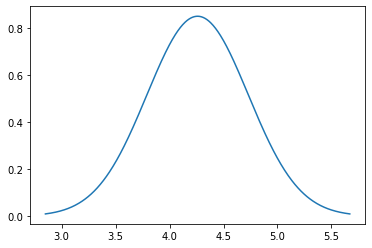

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

generate_graph = True

if generate_graph:

    mu = 4.26
    sigma = 0.4699

    x = np.linspace(mu - 3*sigma, mu + 3 * sigma, 500)
    y = np.exp(-(x-mu)**2 / (2 * sigma ** 2)) / (np.sqrt(2*np.pi) * sigma)

    plt.plot(x, y)
